In [1]:
# imports
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (9, 5)

In [2]:
# definte our true underlying (unknown data generating) model
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

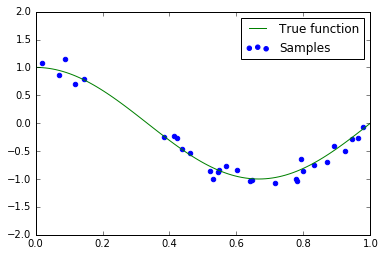

In [12]:
# draw a bunch of random (and noisy!) samples from this underlying true model
np.random.seed(0)
# np.random.seed(1)
n_samples = 30
# n_samples = 300
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

# plot them
X_test = np.linspace(0, 1, 100)
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.plot(X_test, true_fun(X_test), label="True function", color='g')

plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

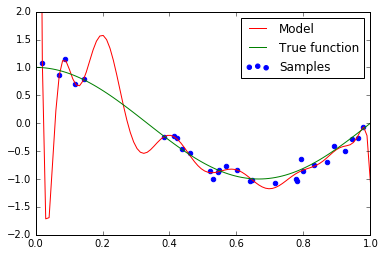

polymonial degree: 15
correlation: 0.988383737079


In [13]:
# choose the complexity of our model (include features of x, x^2, x^3, ..., x^n for our model to use)
polynomialDegree = 15

# use regression on these features to learn our model (this time with a package, rather than by hand)
polynomial_features = PolynomialFeatures(degree=polynomialDegree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# plot this new model with our true function and the samples
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model",color='r')
plt.plot(X_test, true_fun(X_test), label="True function",color='g')
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

# ask how well our new model fit the data
print "polymonial degree:",polynomialDegree
print "correlation:",pipeline.score(X[:, np.newaxis], y)

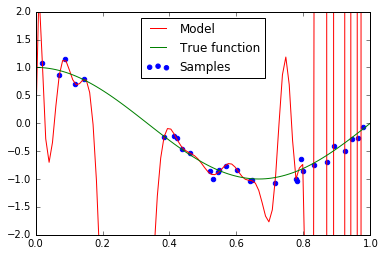

polymonial degree: 300
mean loss from cross validation: 4.13098819371e+23
 std loss from cross validation: 1.23929633687e+24


In [23]:
# choose the complexity of our model (include features of x, x^2, x^3, ..., x^n for our model to use)
polynomialDegree = 15
# polynomialDegree = 4
# polynomialDegree = 1
# polynomialDegree = 30

# use regression on these features to learn our model (this time with a package, rather than by hand)
polynomial_features = PolynomialFeatures(degree=polynomialDegree, include_bias=False)
linear_regression = LinearRegression()
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
pipeline.fit(X[:, np.newaxis], y)

# Evaluate the models using crossvalidation
scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

# plot this new model with our true function and the samples
X_test = np.linspace(0, 1, 100)
plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model",color='r')
plt.plot(X_test, true_fun(X_test), label="True function",color='g')
plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
plt.xlim((0, 1))
plt.ylim((-2, 2))
plt.legend(loc="best")
plt.show()

# ask how well our new model fit the data (now with cross validation!)
print "polymonial degree:",polynomialDegree
print "mean loss from cross validation:",-scores.mean()
print " std loss from cross validation:", scores.std()

polynomialDegree: 1 	correlation: 0.473679628749 	cross validation score: 0.40772896251
polynomialDegree: 2 	correlation: 0.930800785988 	cross validation score: 0.0581843712075
polynomialDegree: 3 	correlation: 0.97091601152 	cross validation score: 0.0187479430731
polynomialDegree: 4 	correlation: 0.973054474819 	cross validation score: 0.0432087498723
polynomialDegree: 5 	correlation: 0.974433321865 	cross validation score: 0.0986757067134
polynomialDegree: 6 	correlation: 0.974729771213 	cross validation score: 0.114344045082
polynomialDegree: 7 	correlation: 0.975058493544 	cross validation score: 0.197177114117
polynomialDegree: 8 	correlation: 0.975075084549 	cross validation score: 0.360319971622
polynomialDegree: 9 	correlation: 0.975997262609 	cross validation score: 21.232562703
polynomialDegree: 10 	correlation: 0.976689563446 	cross validation score: 1516.43702119
polynomialDegree: 11 	correlation: 0.977440316875 	cross validation score: 24016.9377606
polynomialDegree: 12 

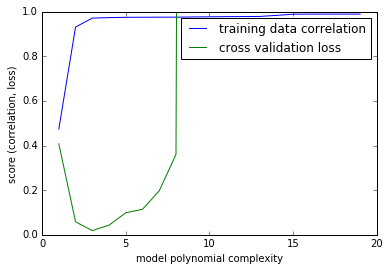

In [20]:
modelSizes = 20
dataToPlot = np.zeros((2,modelSizes-1))

# for models of increasing complexity
for polynomialDegree in range(1,modelSizes):

    # fit this model to the data
    polynomial_features = PolynomialFeatures(degree=polynomialDegree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # record how this model score on corrleation and cross validation loss
    print "polynomialDegree:",polynomialDegree,"\t",
    
    correlation = pipeline.score(X[:, np.newaxis], y)
    dataToPlot[0,polynomialDegree-1] = correlation
    print "correlation:", correlation,"\t",
    
    meanCrossValidationLoss = -cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10).mean()
    dataToPlot[1,polynomialDegree-1] = meanCrossValidationLoss
    print "cross validation score:", meanCrossValidationLoss
    
# plot these scores across model complexity
plt.plot(np.arange(modelSizes-1)+1,dataToPlot[0,:],label="training data correlation")
plt.plot(np.arange(modelSizes-1)+1,dataToPlot[1,:],label="cross validation loss")
plt.ylim((0,1))
plt.ylabel("score (correlation, loss)")
plt.xlabel("model polynomial complexity")
plt.legend(loc="best")
plt.show()